In [3]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [4]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [5]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [38]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/inb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/inb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/inb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/inb/exp/"

#epg Exp
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

# Rec
df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")

# df_3987_corr = pd.read_pickle(parent_MC + "3987_075.pkl")
# df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076_075.pkl")
# df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076_075.pkl")
#bkg2g Exp
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [39]:
epgExpInb = copy(exp_1g_corr)
epgExpInbCDFT = epgExpInb.loc[exp_1g_corr.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

In [40]:
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = df_3987_corr#pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = df_4076_1g_corr#pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = df_4076_2g_corr#pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])

In [41]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[(pi0ExpInb.config == 3)]
pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.config == 3)]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[(pi0ExpInb.config == 2)]
pi0SimInbCD = pi0SimInb.loc[(pi0SimInb.config == 2)]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[(pi0ExpInb.config == 1)]
pi0SimInbFD = pi0SimInb.loc[(pi0SimInb.config == 1)]

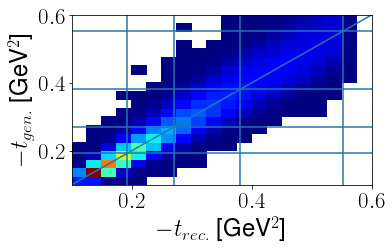

In [42]:
plt.hist2d(dvcsSimInbCDFT.t1, dvcsSimInbCDFT.Gent2, bins = np.linspace(0.1, 0.6,21), cmin = 1, cmap = cmap)
plt.axhline(2*M*(np.sqrt(0.45**2+M**2)-M))
plt.axvline(2*M*(np.sqrt(0.45**2+M**2)-M))

plt.axhline(2*M*(np.sqrt(0.54**2+M**2)-M))
plt.axvline(2*M*(np.sqrt(0.54**2+M**2)-M))

plt.axhline(2*M*(np.sqrt(0.65**2+M**2)-M))
plt.axvline(2*M*(np.sqrt(0.65**2+M**2)-M))


plt.axhline(2*M*(np.sqrt(0.8**2+M**2)-M))
plt.axvline(2*M*(np.sqrt(0.8**2+M**2)-M))

plt.plot(np.linspace(0.1, 0.6, 101), np.linspace(0.1, 0.6, 101))
plt.xlabel(r"$-t_{rec.}$" + " ["+GeV2+"]")
plt.ylabel(r"$-t_{gen.}$" + " ["+GeV2+"]")
# plt.xscale('log')
# plt.yscale('log')
plt.show()

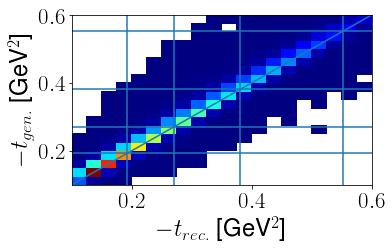

In [43]:
plt.hist2d(dvcsSimInbCDFT.t2, dvcsSimInbCDFT.Gent2, bins = np.linspace(0.1, 0.6,21), cmin = 1, cmap = cmap)
plt.axhline(2*M*(np.sqrt(0.45**2+M**2)-M))
plt.axvline(2*M*(np.sqrt(0.45**2+M**2)-M))

plt.axhline(2*M*(np.sqrt(0.54**2+M**2)-M))
plt.axvline(2*M*(np.sqrt(0.54**2+M**2)-M))

plt.axhline(2*M*(np.sqrt(0.65**2+M**2)-M))
plt.axvline(2*M*(np.sqrt(0.65**2+M**2)-M))


plt.axhline(2*M*(np.sqrt(0.8**2+M**2)-M))
plt.axvline(2*M*(np.sqrt(0.8**2+M**2)-M))

plt.plot(np.linspace(0.1, 0.6, 101), np.linspace(0.1, 0.6, 101))
plt.xlabel(r"$-t_{rec.}$" + " ["+GeV2+"]")
plt.ylabel(r"$-t_{gen.}$" + " ["+GeV2+"]")
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [44]:
contInbCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contInbFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contInbCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
contInb = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

In [45]:
print(contInbFD, contInbCD, contInbCDFT)
print(len(epgExpInbFD), len(epgExpInbCD), len(epgExpInbCDFT))
print(len(dvcsSimInbFD)*1/(1-contInbFD), len(dvcsSimInbCD)*1/(1-contInbCD), len(dvcsSimInbCDFT))

0.25373407862207475 0.09666759784062873 0.003392741200126676
24535 97503 93798
82556.36259825922 214664.05891835675 171954


In [46]:
print(len(dvcsSimInbFD)*1/(1-0.35)/len(epgExpInbFD))
print(len(dvcsSimInbCD)*1/(1-contInbCD)/len(epgExpInbCD))
print(len(dvcsSimInbCDFT)*1/(1-contInbCDFT)/len(epgExpInbCDFT))
print(len(pi0ExpInbFD), len(pi0ExpInbCD), len(pi0ExpInbCDFT))
print(len(pi0SimInbFD), len(pi0SimInbCD), len(pi0SimInbCDFT))
print(len(pi0SimInbFD)/len(pi0ExpInbFD))
print(len(pi0SimInbCD)/len(pi0ExpInbCD))

3.863178191280902
2.201614913575549
1.839478256126478
19868 24380 2054
105599 108248 8281
5.315029192671632
4.440032813781788


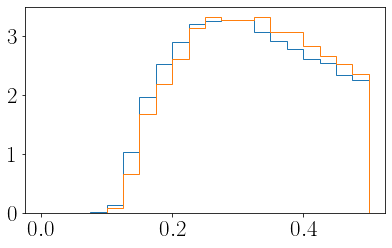

In [47]:
plt.hist(pi0SimInbCD.t1, bins = np.linspace(0, 0.5, 21), histtype = 'step', density = True)
plt.hist(pi0ExpInbCD.t1, bins = np.linspace(0, 0.5, 21), histtype = 'step', density = True)
plt.show()

In [48]:
def smearingDVCS4(df_epg, sigma = 0, sigma2 = 0, sigma3 = 0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[df_epg.Psector<7, 'Pp'] = np.random.normal(1, sigma, len(df_epg.loc[df_epg.Psector<7]))*df_epg.loc[df_epg.Psector<7, 'Pp']
    df_epg.loc[df_epg.Psector<7, 'Pe'] = np.sqrt(df_epg.loc[df_epg.Psector<7, 'Pp']**2+M**2)
    df_epg.loc[df_epg.Psector<7, 'Ptheta'] = np.random.normal(1, sigma2, len(df_epg.loc[df_epg.Psector<7]))*df_epg.loc[df_epg.Psector<7, 'Ptheta']
    df_epg.loc[df_epg.Psector>7, 'Pphi'] = np.random.normal(1, np.abs(sigma3/np.sin(np.radians(df_epg.loc[:, "Ptheta"]))), len(df_epg.loc[df_epg.Psector<7]))*df_epg.loc[df_epg.Psector<7, 'Pphi']
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

#     df_epg.loc[:, 'Gp'] = np.random.normal(1, sigma, len(df_epg))*df_epg.loc[:, 'Gp']
#     df_epg.loc[:, 'Ge'] = df_epg.loc[:, 'Gp']
# #     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
# #     df_epg.loc[:, 'Gphi'] = getPhi(gam)
#     df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    
    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg

In [49]:
# epgExpInbFD = epgExpInbFD.loc[epgExpInbFD.Psector != epgExpInbFD.Gsector]

coneAngle 30.747529658404346
reconGam 0.43136464602568736
coplanarity 4.2686952863403755
ME_epg 0.05358543807432481
MM2_epg -0.001186589231600278
MM2_eg 0.9433497699578085
MM2_ep -0.01205969797030736
MPt 0.06708028944445214


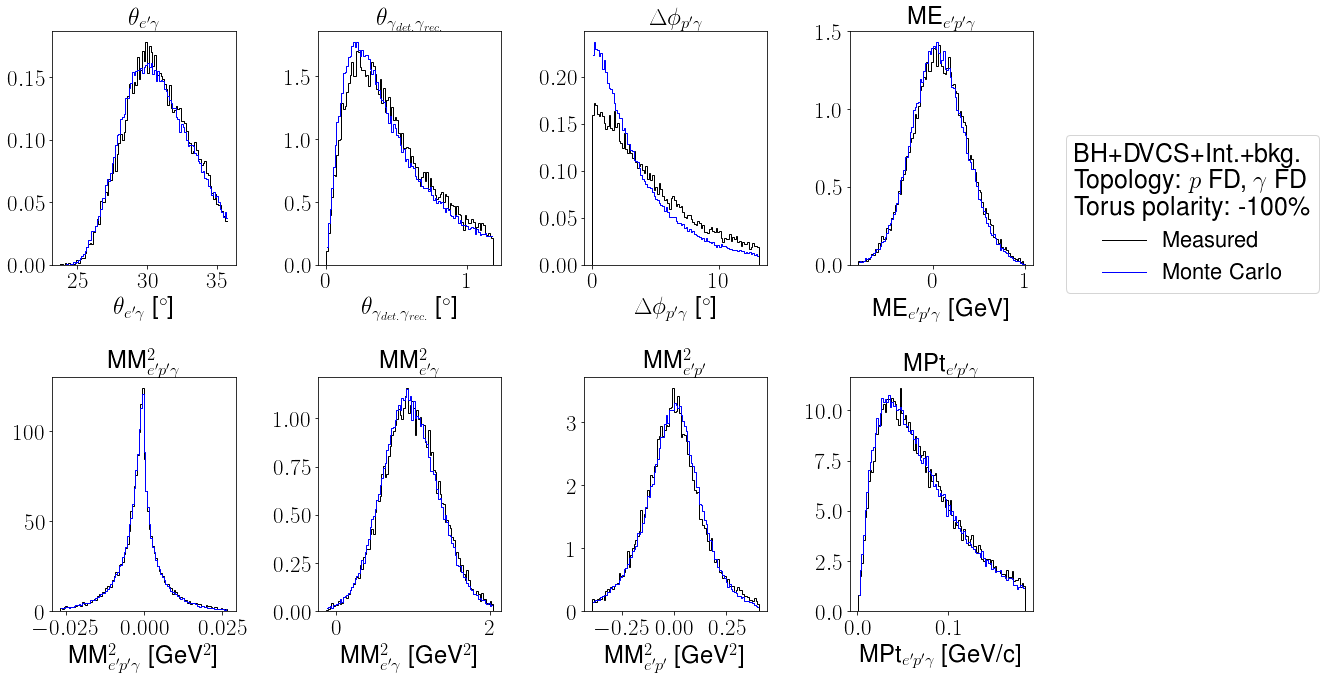

<Figure size 432x288 with 0 Axes>

In [50]:
# contInbFD = 0.4

df2 = bkgSimInbFD#smearingDVCS4(bkgSimInbFD, 0, 0.14, 0)
df1 = dvcsSimInbFD#smearingDVCS4(dvcsSimInbFD, 0, 0.14, 0)

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))

for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(df2[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(df1[varstoplot[ind]], bins, density = True)
        simDist = (1-contInbFD)*simDist_dvcs + contInbFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

coneAngle 21.77620760849925
reconGam 0.3111061627339317
coplanarity 2.257341703906257
ME_epg 0.01487288069330364
MM2_epg -0.0012733675457547067
MM2_eg 0.9074313902629001
MM2_ep 0.00202701937412844
MPt 0.04688468622231854


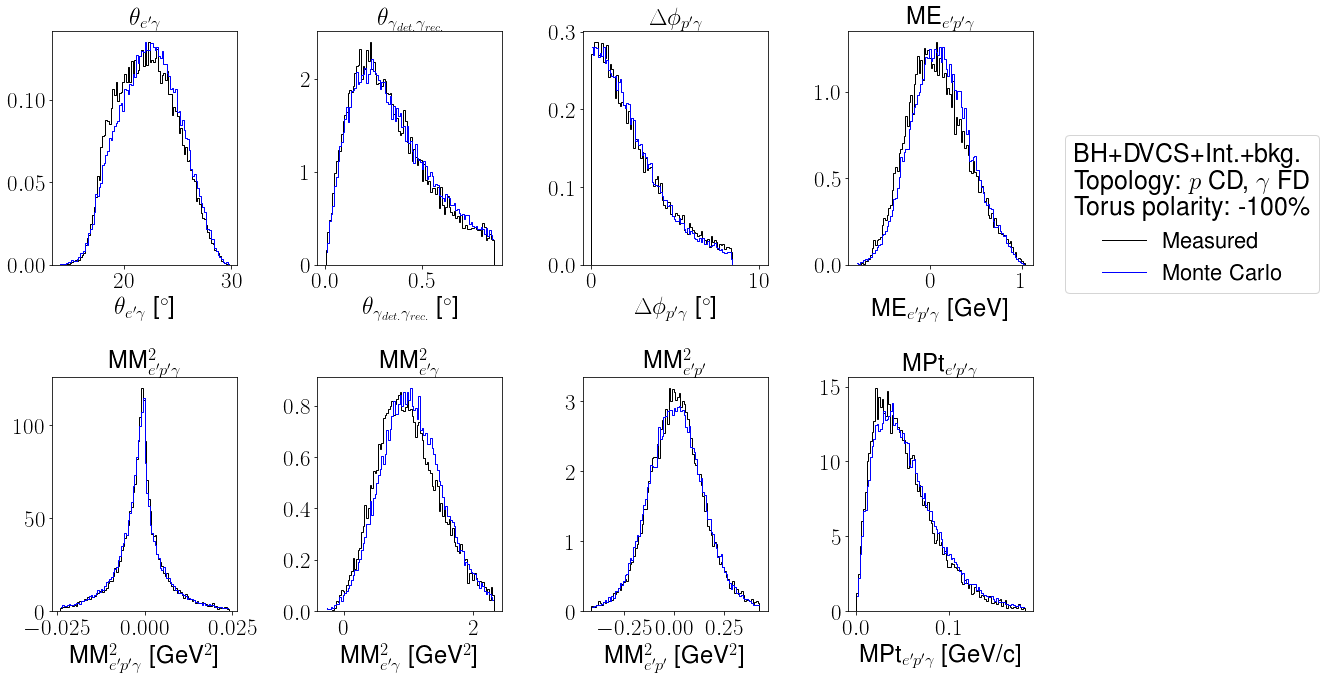

<Figure size 432x288 with 0 Axes>

In [76]:
gpmin = 5
gpmax = 6

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.loc[(bkgSimInbCD.Gp>gpmin)& (bkgSimInbCD.Gp<gpmax),varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.loc[(dvcsSimInbCD.Gp>gpmin)& (dvcsSimInbCD.Gp<gpmax),varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contInbCD)*simDist_dvcs + contInbCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD.loc[(epgExpInbCD.Gp>gpmin)& (epgExpInbCD.Gp<gpmax),varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbCD.loc[(epgExpInbCD.Gp>gpmin)& (epgExpInbCD.Gp<gpmax),varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

coneAngle 22.117378032480516
reconGam 0.25513508147066294
coplanarity 2.201617465476664
ME_epg -0.003744609858988588
MM2_epg -0.0019265396745335585
MM2_eg 0.8879152831800973
MM2_ep 0.024984483275547337
MPt 0.033763213136656256


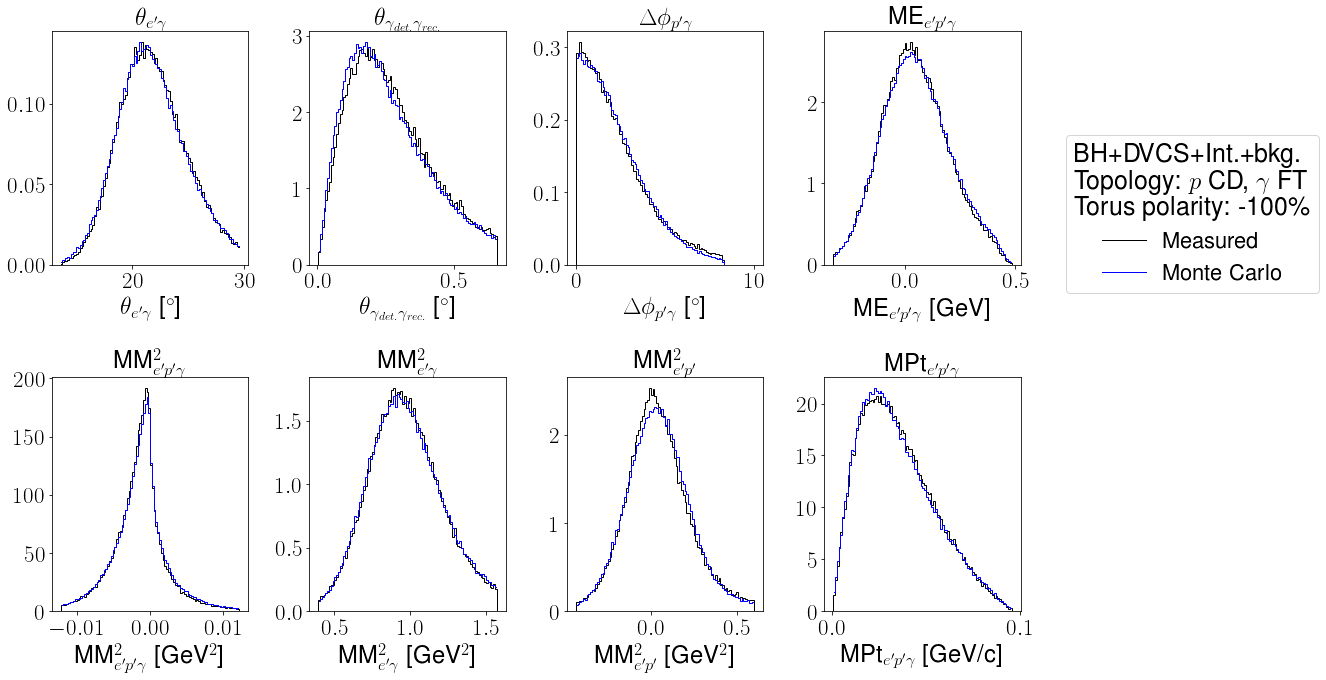

<Figure size 432x288 with 0 Axes>

In [28]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contInbCDFT)*simDist_dvcs + contInbCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: -100\%")
plt.show()
plt.clf()

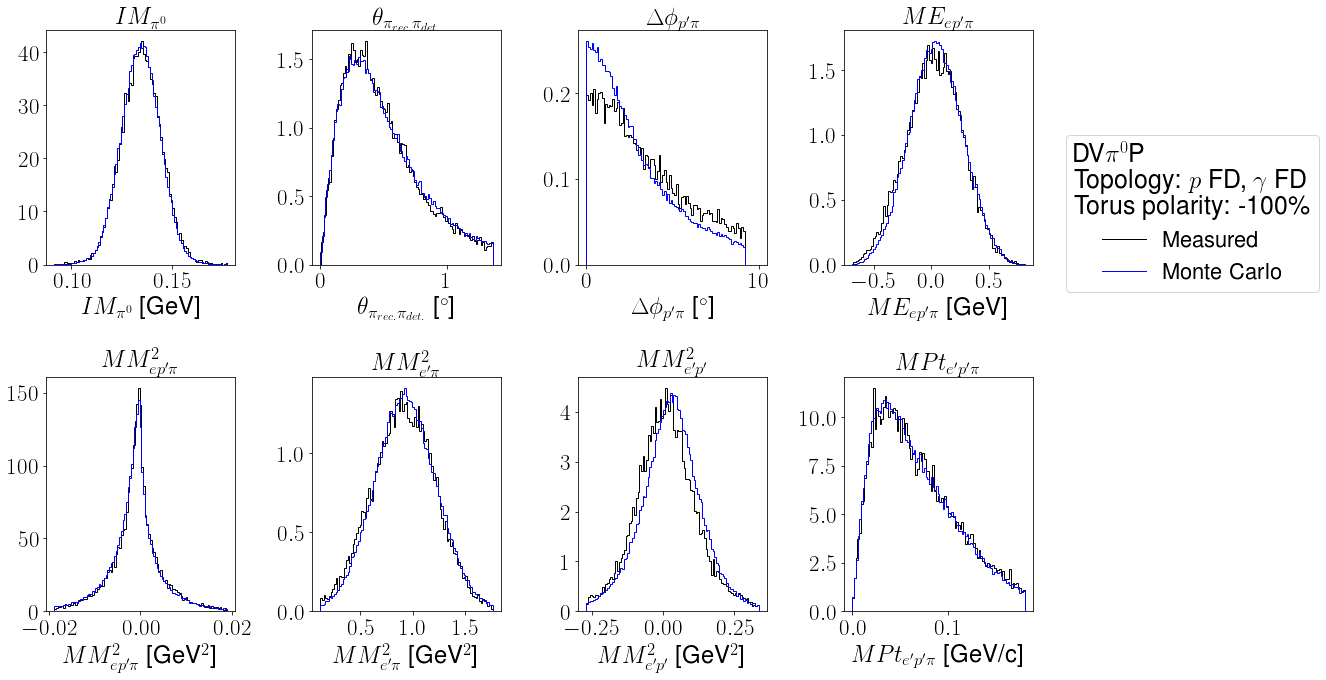

In [29]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 101#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimInbFD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpInbFD[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()

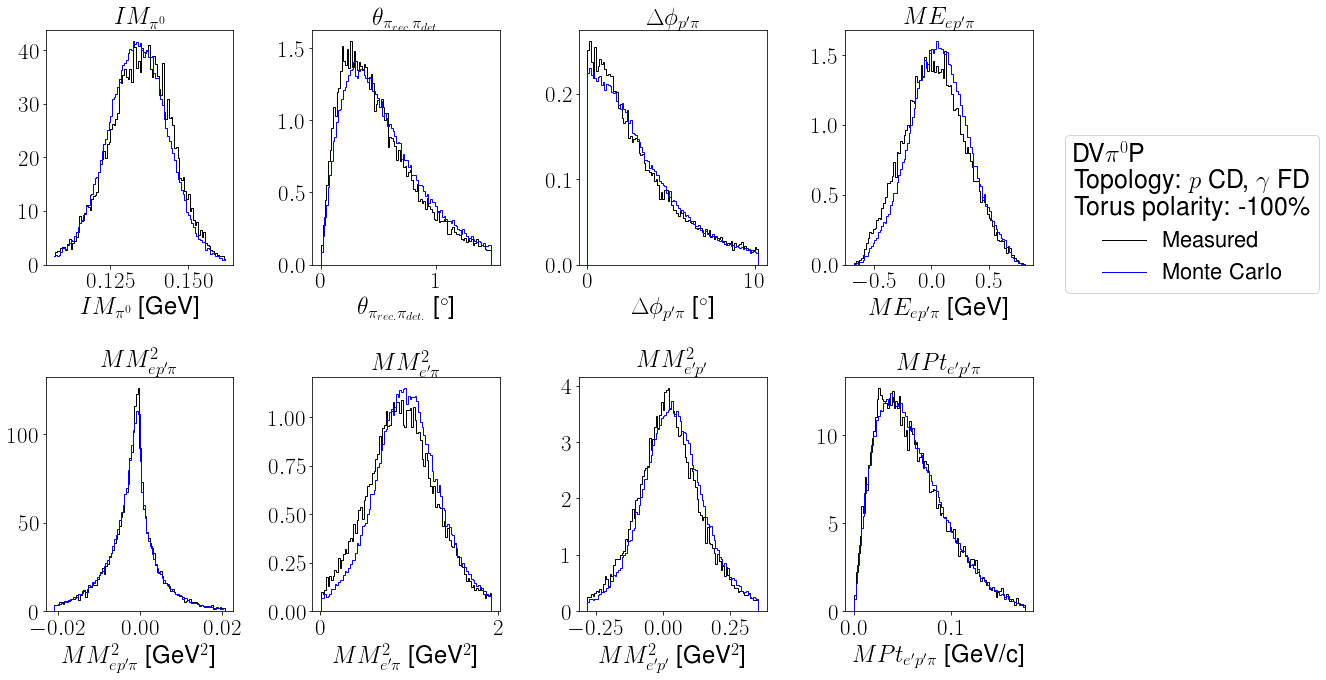

In [34]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
#         if ind == 2 :
#             bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimInbCD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpInbCD[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%")
plt.show()

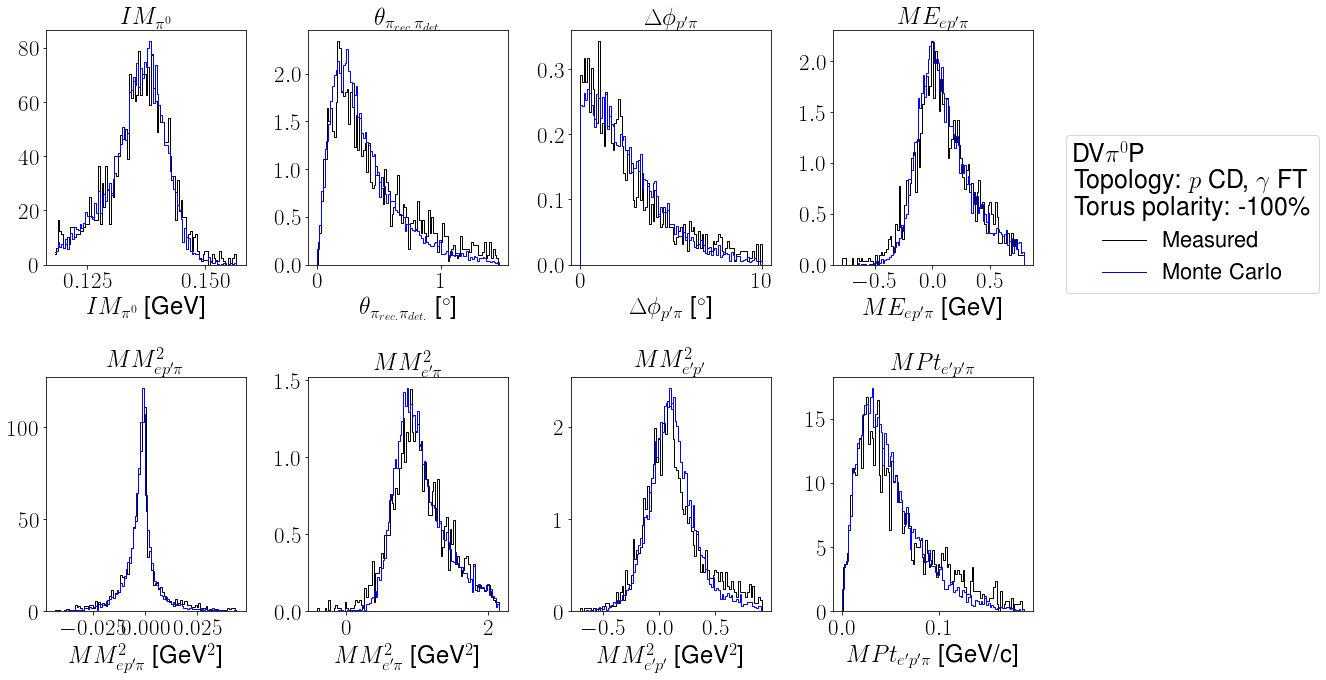

In [35]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimInbCDFT[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpInbCDFT[varstoplot[ind]], bins, density=True)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: -100\%")
plt.show()

In [22]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_finaldraft2/outb/exp/"

df_4240_corr = pd.read_pickle(parent_MC + "4240.pkl")
df_4243_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4243.pkl")
df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [23]:
epgExpOutb = copy(exp_1g_corr)
pi0ExpOutb = copy(exp_2g_corr)
dvcsSimOutb = df_4240_corr
bkgSimOutb = df_4243_1g_corr
pi0SimOutb = df_4243_2g_corr

In [24]:
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]
bkgSimOutbCDFT = bkgSimOutb.loc[bkgSimOutb.config == 3]
pi0ExpOutbCDFT = pi0ExpOutb.loc[(pi0ExpOutb.config == 3)]
pi0SimOutbCDFT = pi0SimOutb.loc[(pi0SimOutb.config == 3)]

epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]
pi0ExpOutbCD = pi0ExpOutb.loc[(pi0ExpOutb.config == 2)]
pi0SimOutbCD = pi0SimOutb.loc[(pi0SimOutb.config == 2)]

epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]
pi0ExpOutbFD = pi0ExpOutb.loc[(pi0ExpOutb.config == 1)]
pi0SimOutbFD = pi0SimOutb.loc[(pi0SimOutb.config == 1)]

In [25]:
len(dvcsSimOutbFD)

31120

In [26]:
contOutbCD = len(pi0ExpOutbCD)*len(bkgSimOutbCD)/len(pi0SimOutbCD)/len(epgExpOutbCD)
contOutbFD = len(pi0ExpOutbFD)*len(bkgSimOutbFD)/len(pi0SimOutbFD)/len(epgExpOutbFD)
contOutbCDFT = len(pi0ExpOutbCDFT)*len(bkgSimOutbCDFT)/len(pi0SimOutbCDFT)/len(epgExpOutbCDFT)
contOutb = len(pi0ExpOutb)*len(bkgSimOutb)/len(pi0SimOutb)/len(epgExpOutb)

In [27]:
print(len(epgExpOutbFD), len(epgExpOutbCD), len(epgExpOutbCDFT))

13547 193909 100113


In [28]:
print(len(pi0ExpOutbFD), len(pi0ExpOutbCD), len(pi0ExpOutbCDFT))

17014 99276 2715


In [29]:
print(contOutbFD, contOutbCD, contOutbCDFT)

0.33719990538694783 0.13619579958672953 0.004203926196371854


In [30]:
def correctDVCS3(df_epg, correction=0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]
#     df_epg.loc[:, 'Pp'] = mag(pro)
#     df_epg.loc[:, 'Pe'] = getEnergy(pro, 0)
#     df_epg.loc[:, 'Ptheta'] = getTheta(pro)
#     df_epg.loc[:, 'Pphi'] = getPhi(pro)

    df_epg.loc[df_epg.Gsector<7, 'Gp'] = df_epg.loc[df_epg.Gsector<7, 'Gp'] + correction
    df_epg.loc[df_epg.Gsector<7, 'Ge'] = df_epg.loc[df_epg.Gsector<7, 'Gp']
#     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
#     df_epg.loc[:, 'Gphi'] = getPhi(gam)
    df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
    df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg

coneAngle 30.741462707800455
reconGam 0.6415899447157646
coplanarity 3.332033862245035
ME_epg 0.1217209826265104
MM2_epg -0.0026414436021592706
MM2_eg 1.0113965857729665
MM2_ep -0.023771341061552737
MPt 0.07182887060543339


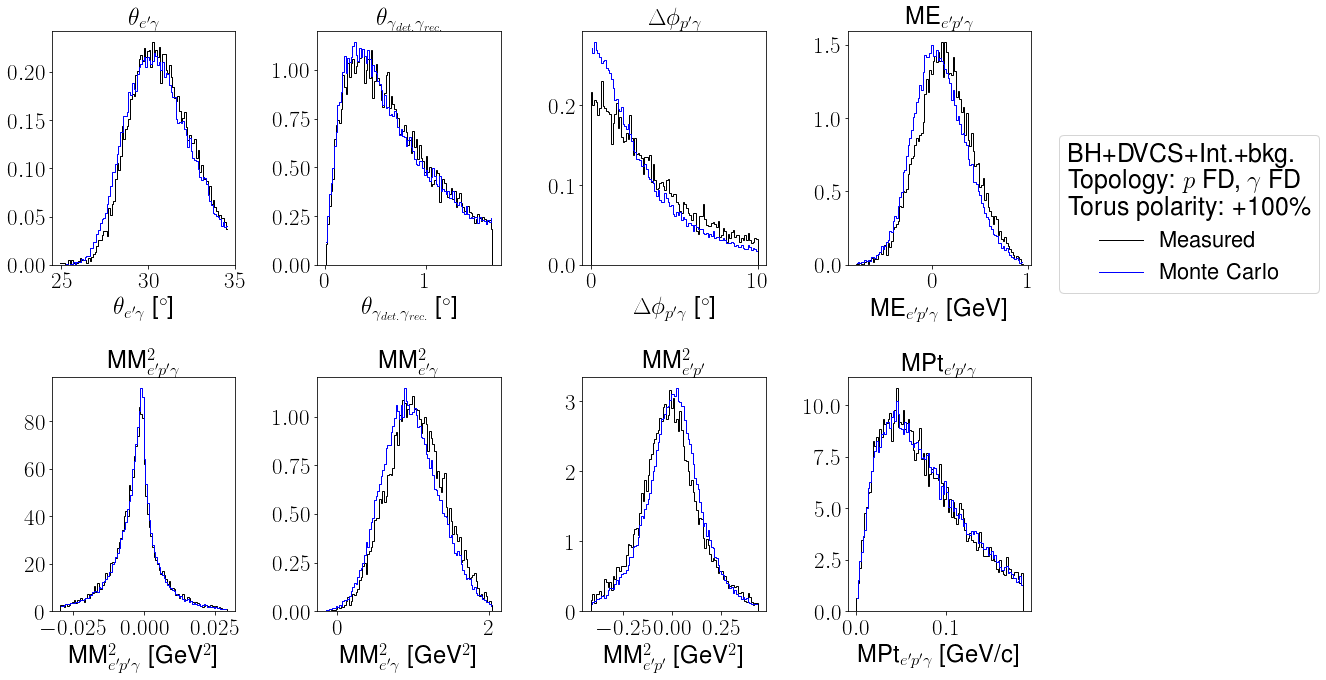

<Figure size 432x288 with 0 Axes>

In [31]:
# contOutbFD = 0.55

df3 = epgExpOutbFD#correctDVCS3(epgExpOutbFD, 0.1)

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        simDist = (1-contOutbFD)*simDist_dvcs + contOutbFD*simDist_dvpi0
        expDist, bins = np.histogram(df3[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(df3[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbFD)/len(pi0SimOutbFD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()
plt.clf()

coneAngle 21.67307839894093
reconGam 0.3543198588976847
coplanarity 2.0757107448400403
ME_epg 0.03283598412925582
MM2_epg -0.0013630715172162657
MM2_eg 0.9344593915620655
MM2_ep 0.023440883602299584
MPt 0.051000058714054594


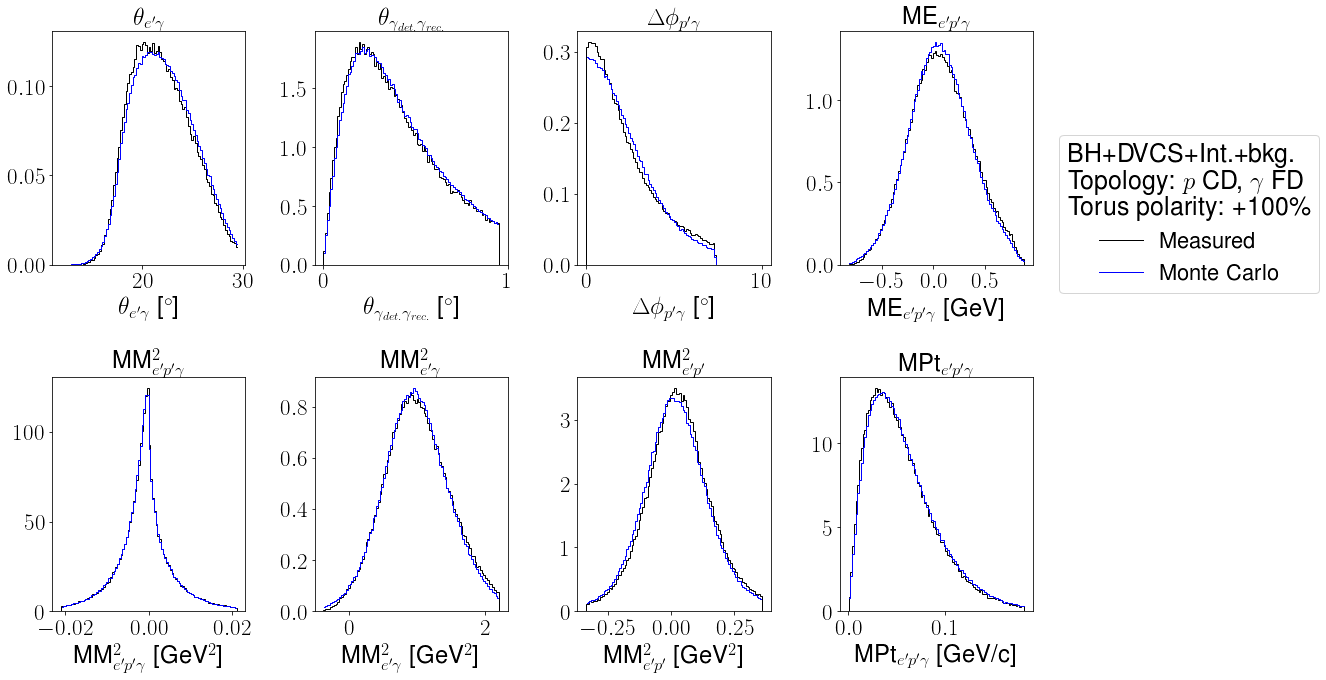

<Figure size 432x288 with 0 Axes>

In [32]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        simDist = (1-contOutbCD)*simDist_dvcs + contOutbCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpOutbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCD)/len(pi0SimOutbCD)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()
plt.clf()

coneAngle 21.830968658107526
reconGam 0.27795484564646644
coplanarity 2.3166926700328414
ME_epg 0.006107490046449026
MM2_epg -0.0020655337479366684
MM2_eg 0.9020200662072837
MM2_ep 0.04809106061658313
MPt 0.036554568441431026


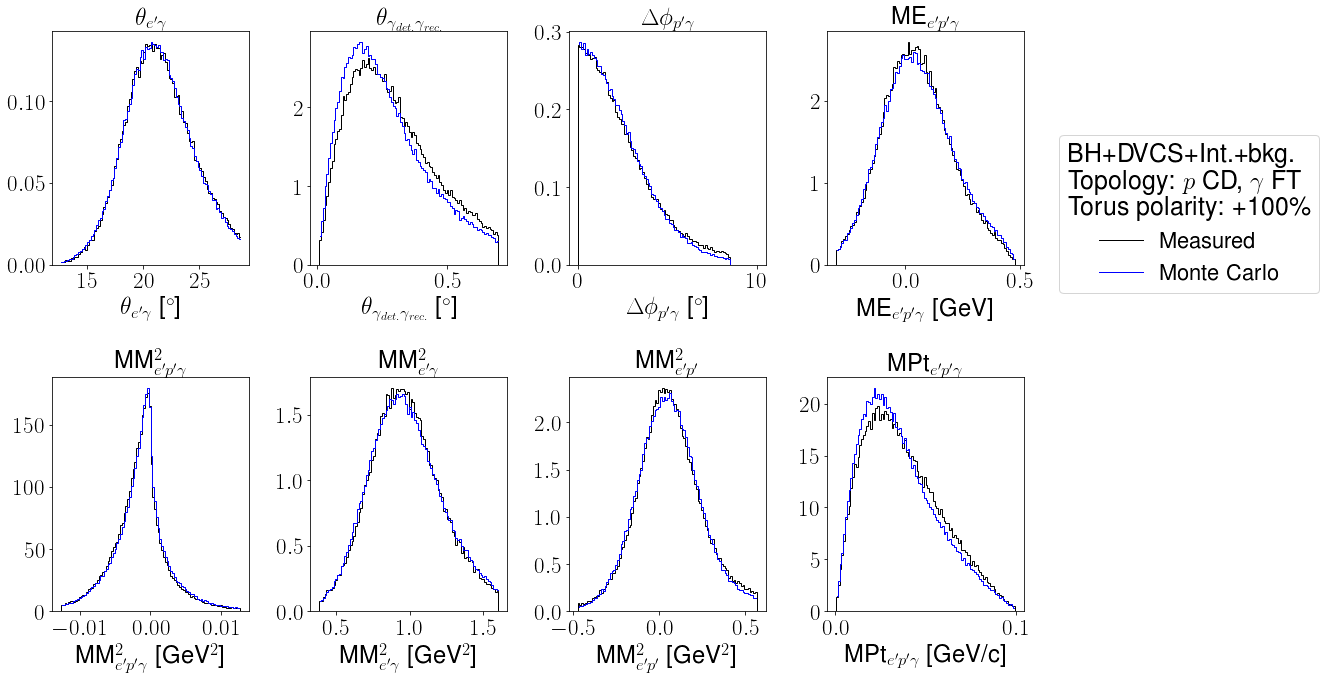

<Figure size 432x288 with 0 Axes>

In [33]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi_{p'\gamma}$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        simDist = (1-contOutbCDFT)*simDist_dvcs + contOutbCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpOutbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        if ind == 0:
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')  
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(epgExpOutbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpOutbCDFT)/len(pi0SimOutbCDFT)*simDist_dvpi0, bins))
        axs[yind, xind].set_title(title[ind])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "BH+DVCS+Int.+bkg.\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: +100\%")
plt.show()
plt.clf()

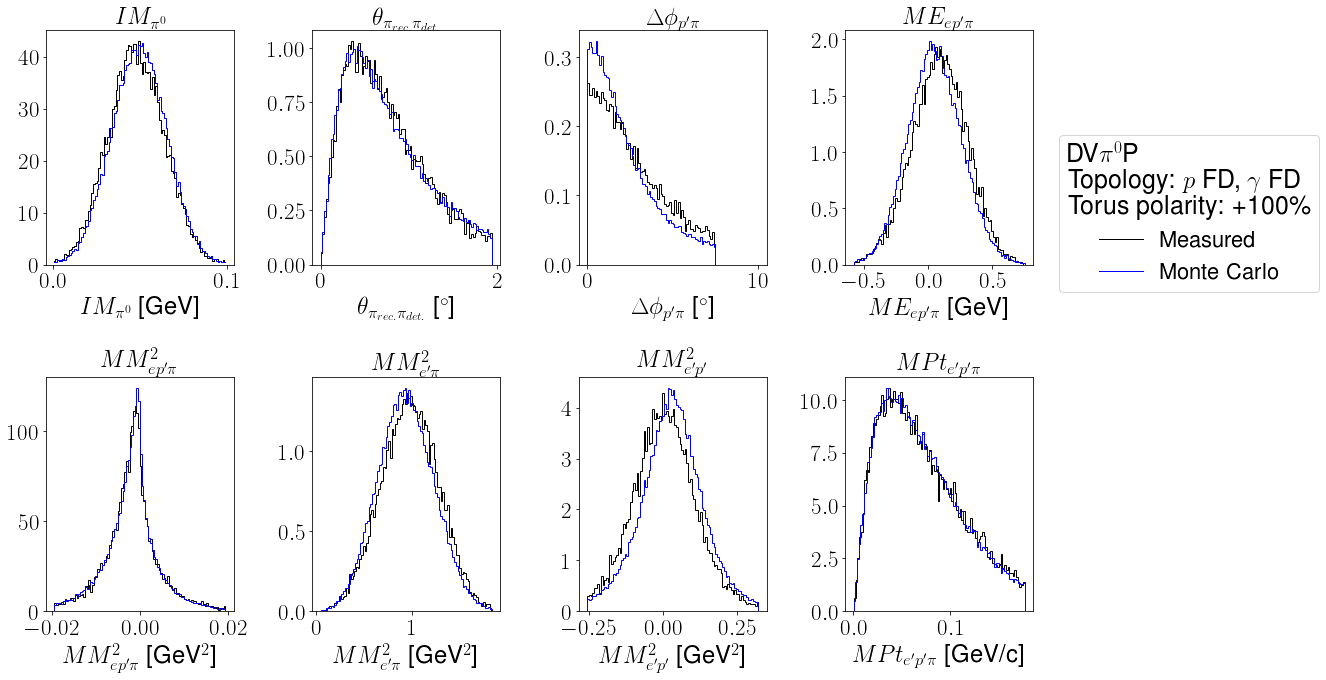

In [37]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimOutbFD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpOutbFD[varstoplot[ind]], bins, density=True)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" FD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()

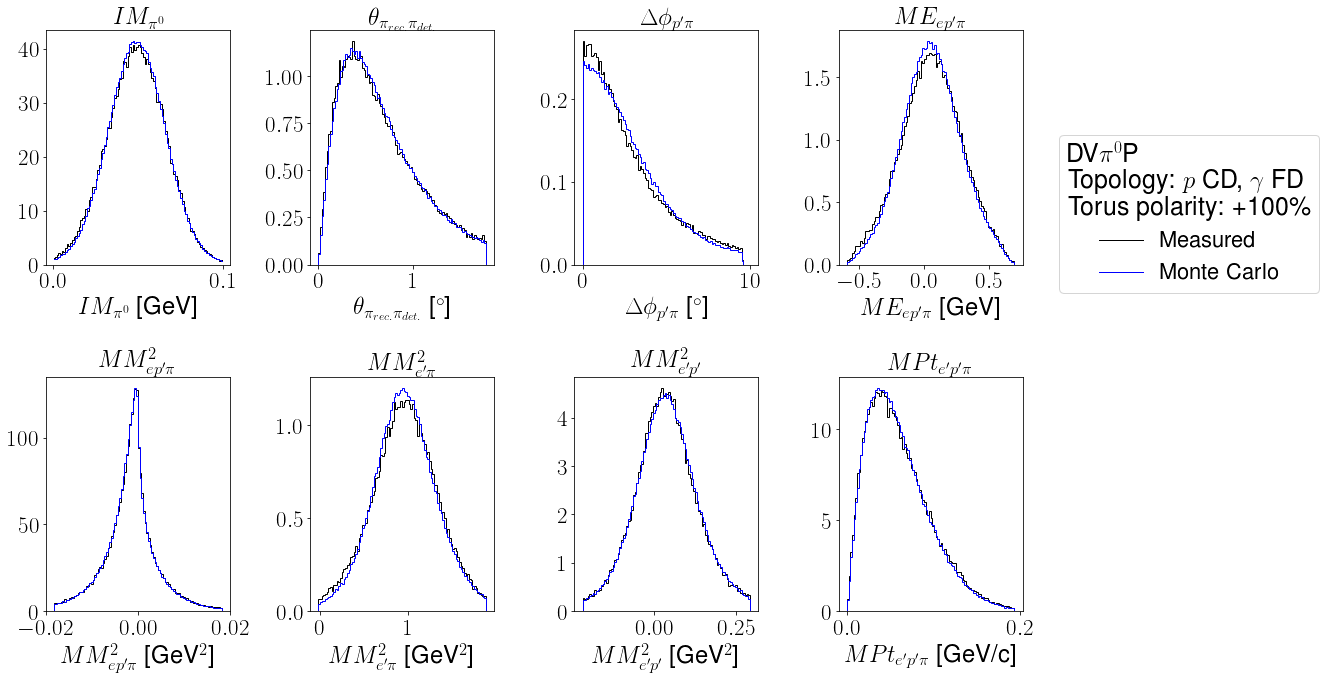

In [35]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimOutbCD[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpOutbCD[varstoplot[ind]], bins, density=True)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpOutbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimOutbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: +100\%")
plt.show()

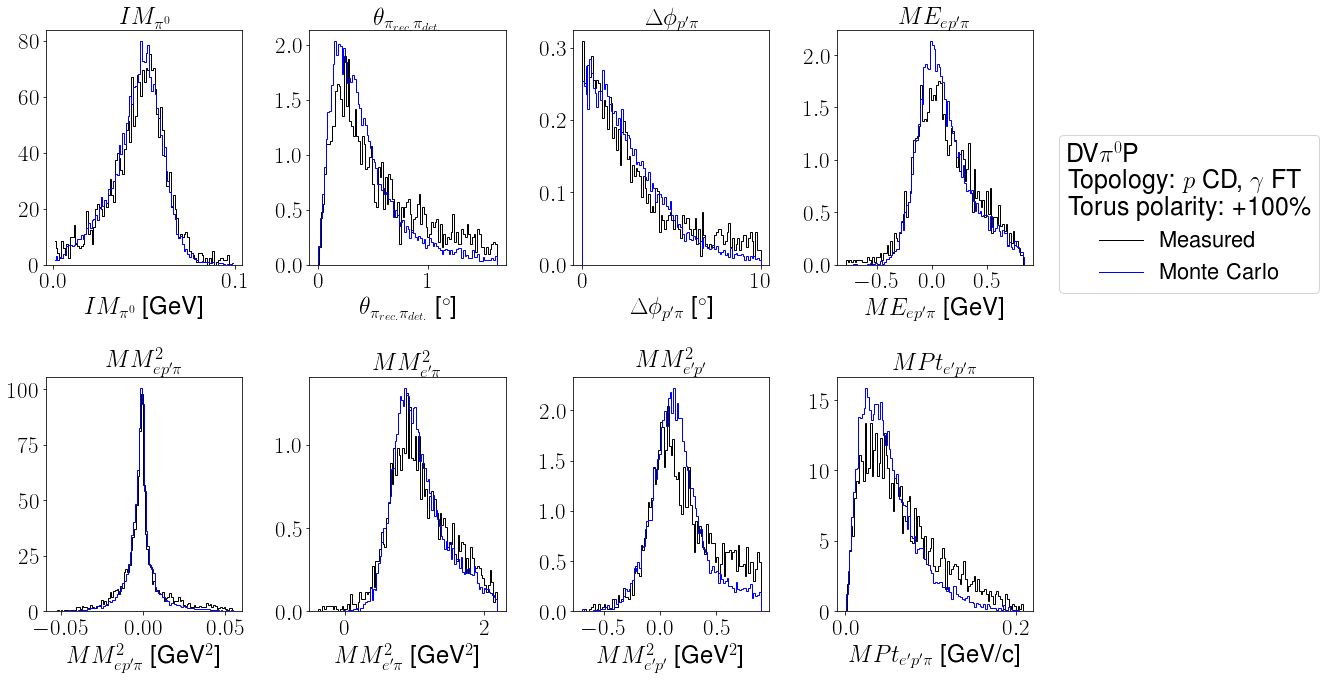

In [36]:
varstoplot = ["Mpi0", "reconPi", "coplanarity", "ME_epgg", "MM2_epgg", "MM2_egg", "MM2_ep", "MPt"]
title = [r"$IM_{\pi^0}$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$\Delta\phi_{p'\pi}$", r"$ME_{ep'\pi}$", r"$MM^2_{ep'\pi}$", r"$MM^2_{e'\pi}$", r"$MM^{2}_{e'p'}$", r"$MPt_{e'p'\pi}$" ]
unit = [GeV, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, -0.04, 0, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 10, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        if ind == 2 :
            bins = np.linspace(start, end, 101)
        if ind == 0 :
            simDist_dvpi0, bins = np.histogram(pi0SimOutbCDFT[varstoplot[ind]], bins, density = True)
            simDist = simDist_dvpi0
            expDist, bins = np.histogram(pi0ExpOutbCDFT[varstoplot[ind]], bins, density=True)
            axs[yind, xind].step(bincenters, expDist, where='mid',color='k', linewidth=1, label = 'Measured')           
            axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1, label = 'Monte Carlo')           
            axs[yind, xind].set_ylim(bottom = 0)
        else:
            axs[yind, xind].hist(pi0ExpOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
            axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
fig.legend(bbox_to_anchor = (1.25, 0.8), title = "DV"+r"$\pi^0$"+"P\nTopology: "+r"$p$"+" CD, "+r"$\gamma$"+" FT\n"+"Torus polarity: +100\%")
plt.show()

In [65]:
len(epgExpInb.loc[epgExpInb.t2<0.55, :])+len(epgExpOutb.loc[epgExpOutb.t2<0.55, :])

515548

In [75]:
parent_Gen = "/volatile/clas12/sangbaek/nov2021/convPkl_Gen/3987/"
df_3987_Gen = pd.read_pickle(parent_Gen + "3987.pkl")
M = 0.938272081
k= 2*M*(np.sqrt(0.8**2+M**2)-M)
x3 = 1-(4-M**2)/2/M/3
x4 = 2*(1-np.sqrt((k-M**4+4*M**2)/k))/(M**4/k - 4*M**2/k)
x5 = (-1+np.sqrt(1+4*M**2/k*(1+M/8.604/2)))/2/M**2*k
y3 = 6*M*x3
y4 = (4-M**2)*x4/(1-x4)
y5 = 2*M*8.604*x5
c4 = y4/2/M/8.604
c5 = np.sqrt(y4*y5)/2/M/8.604

df_3987_Gen = df_3987_Gen.loc[(df_3987_Gen.Q2>y3) & (df_3987_Gen.Q2<np.sqrt(y3*y4)) & (df_3987_Gen.xB>=c4) & (df_3987_Gen.xB<c5)]
df_3987_Gen = df_3987_Gen[(df_3987_Gen.t2>=.25)&(df_3987_Gen.t2<.35)]

In [76]:
y3, np.sqrt(y3*y4)

(2.5099869839840707, 3.2950476730109357)

In [77]:
c4, c5

(0.26791235644405376, 0.38676488143676857)

In [ ]:
dvcsSimInb.radMode == 0
dvcsSimInb

In [78]:
dvcsSimInb = dvcsSimInb.loc[(dvcsSimInb.Q2>y3) & (dvcsSimInb.Q2<np.sqrt(y3*y4)) & (dvcsSimInb.xB>=c4) & (dvcsSimInb.xB<c5)]
dvcsSimInb = dvcsSimInb[(dvcsSimInb.t2>=.25)&(dvcsSimInb.t2<.35)]

In [81]:
print(sum(dvcsSimInb.radMode == 1), sum(dvcsSimInb.radMode == 2), sum(dvcsSimInb.radMode == 3))

8102 349 92


In [82]:
8102/52190

0.1552404675225139

In [83]:
349/6780

0.05147492625368732

In [84]:
92/3411

0.026971562591615362

In [143]:
dvcsSimInb.radMode[:20],dvcsSimInb.GenEpx[:20]+ dvcsSimInb.GenPpx[:20]+dvcsSimInb.GenGpx[:20],dvcsSimInb.GenGp[:20],dvcsSimInb.event[:20]

(70     1
 129    1
 147    1
 148    1
 307    1
 330    3
 352    1
 445    1
 532    1
 570    1
 713    1
 725    1
 799    1
 814    1
 836    1
 851    1
 890    1
 906    1
 931    1
 954    1
 Name: radMode, dtype: int32,
 70    -5.960464e-08
 129    0.000000e+00
 147   -9.998679e-05
 148   -1.000166e-04
 307    0.000000e+00
 330   -2.589998e-02
 352    1.000315e-04
 445   -1.000613e-04
 532   -3.725290e-09
 570    2.980232e-08
 713    0.000000e+00
 725   -2.980232e-08
 799   -2.980232e-08
 814   -2.980232e-08
 836   -2.980232e-08
 851   -9.998679e-05
 890   -4.470348e-08
 906    2.980232e-08
 931   -1.000017e-04
 954    0.000000e+00
 dtype: float64,
 70     0.2135
 129   -1.0071
 147   -0.6898
 148    0.3656
 307    1.0685
 330    0.6938
 352    0.6956
 445    0.1826
 532    0.6385
 570    0.6815
 713   -0.8397
 725    0.1638
 799    0.9242
 814   -0.5796
 836    1.1167
 851   -0.1394
 890    1.1936
 906    0.0635
 931   -0.8092
 954    0.1828
 Name: GenGpy, dtype: float64,
 7

<AxesSubplot:>

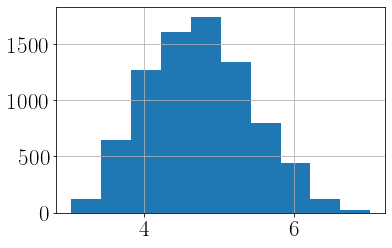

In [91]:
dvcsSimInb.loc[dvcsSimInb.radMode == 1].Gp.hist()